In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from gtda.diagrams import PersistenceEntropy, Amplitude, NumberOfPoints, ComplexPolynomial, PersistenceLandscape, HeatKernel, Silhouette, BettiCurve, PairwiseDistance, PersistenceImage 
from gtda.plotting import plot_point_cloud
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
from hausdorff import hausdorff_distance
import numpy as np
import pickle as pickle
import gudhi as gd  
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import norm
from sklearn.decomposition import KernelPCA
import plotly.io as pio

%matplotlib inline

In [2]:
# choose individuum
subject = "m292"

# Load data

In [3]:
label_list = [0, 1, 2, 3, 4]

In [4]:
# All features
feature_df  = pd.read_csv("Features/All_Features.csv")

In [5]:
# Load persistence diagrams
persistence_diagrams = np.load("Embeddings_and_Persistence_Diagrams/"+str(subject)+"/Persistence_Diagrams.npy", allow_pickle=True).item()# TODO do this in Preprocessing_And_Computing_...

In [6]:
extended_persistence_diagrams  = np.load('Embeddings_and_Persistence_Diagrams/'+str(subject)+'/Extended_Persistence_Diagrams.npz', \
    allow_pickle=True)

# Signatures

## Heat Kernel

In [7]:
HK = HeatKernel(sigma=50000, n_bins=100)

In [8]:
def heat_kernel_intensity(heatkernel, homology_dimension):
    """ Computes mean intensity of a heatkernel. Only takes positive values because otherwise the mean would
      always be zero.

    Parameters:
    - heatkernel (list of lists): heatkernel of all homology dimensions
    - homology_dimension (int): Which homology dimension to look at (0, 1 or 2)

    Returns:
    - mean intensity of heatkernel of homology dimension homology_dimension
    """
    
    positives =  [x for inner_list in heatkernel[0][homology_dimension] for x in inner_list if x > 0]
    
    return np.mean(positives)

In [41]:
label = 4
heatkernel = HK.fit_transform(extended_persistence_diagrams["Label_"+str(label)])

Heat kernel intensity of label 4  for homology dimension 0: 1.3559316061210466e-09


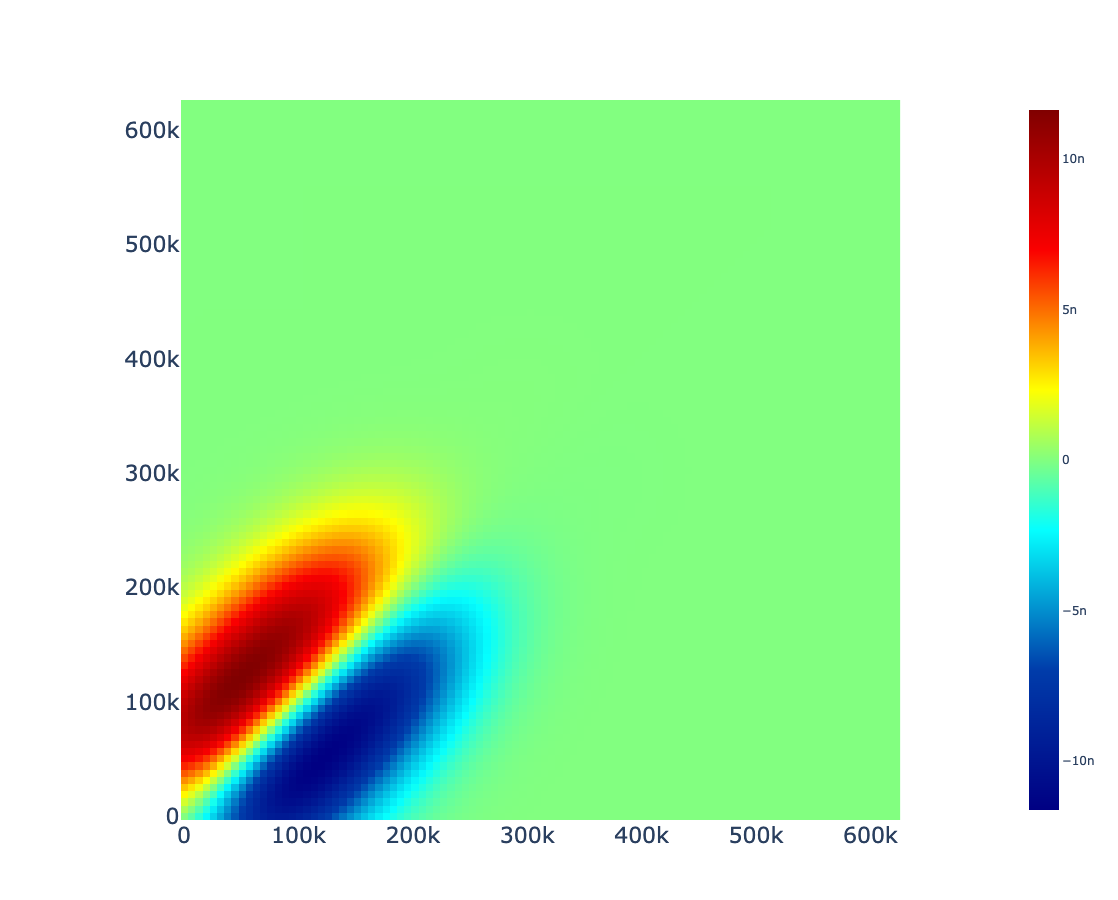

In [42]:
print("Heat kernel intensity of label "+str(label)+"  for homology dimension 0: " + str(heat_kernel_intensity(heatkernel, 0)))

plotly_params = {
    "layout": {
        "title": {
            "text": "",
            "x": 0.5,  # Ccenter the title horizontally
            "xanchor": "center",  # Anchor the title text at the center
        },
        "width": 1100,  
        "height": 900,  
        "xaxis": {"tickfont": {"size": 22}}, 
        "yaxis": {"tickfont": {"size": 22}}    
    }
}


fig = HK.plot(heatkernel, homology_dimension_idx=0, colorscale='jet', plotly_params=plotly_params)

fig.show()

# Save the plot as an image (PNG format)
pio.write_image(fig, "Data_Exploration_Plots/Heatkernel of Dimension 0 (Label "+str(label)+").png")

Heat kernel intensity of label 4 for homology dimension 0: 1.3559316061210466e-09


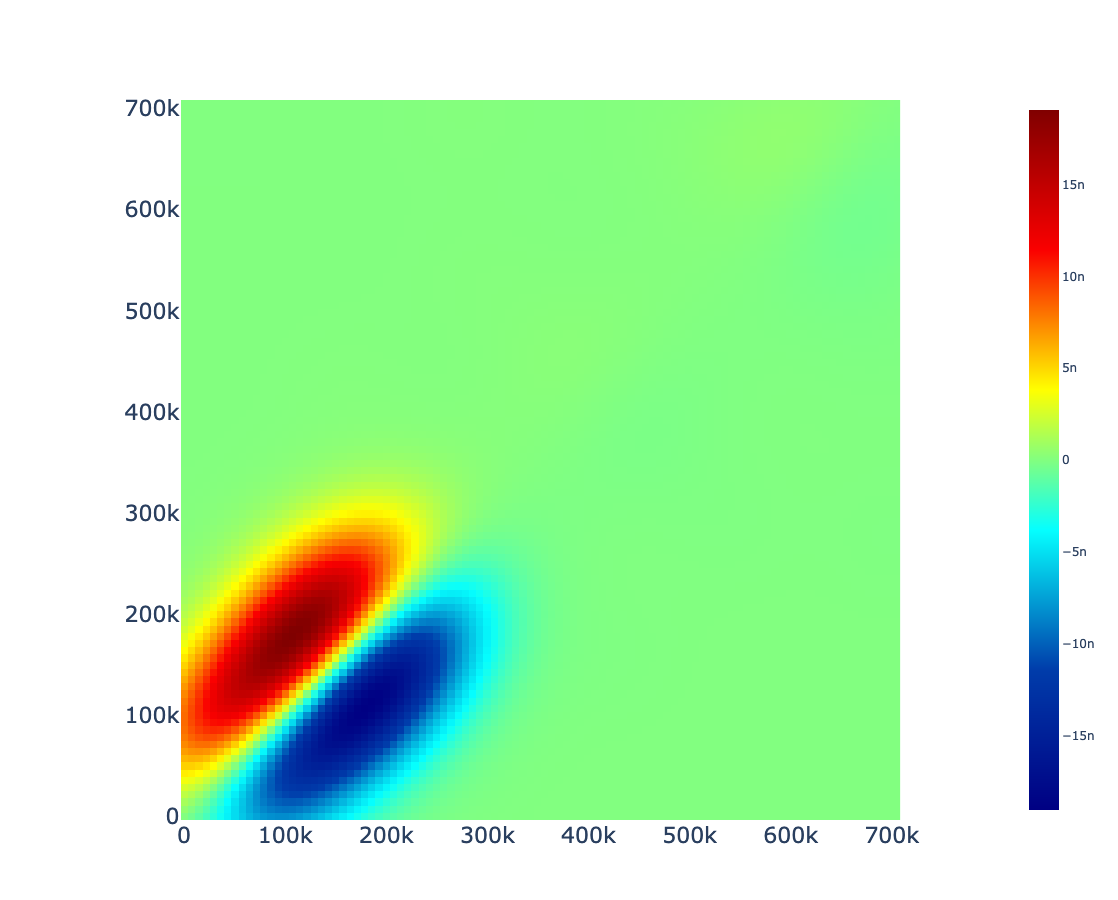

In [43]:
print("Heat kernel intensity of label "+str(label)+" for homology dimension 0: " + str(heat_kernel_intensity(heatkernel, 0)))

plotly_params = {
    "layout": {
        "title": {
            "text": "",
            "x": 0.5,  # Ccenter the title horizontally
            "xanchor": "center",  # Anchor the title text at the center
        },
        "width": 1100,  
        "height": 900,  
        "xaxis": {"tickfont": {"size": 22}}, 
        "yaxis": {"tickfont": {"size": 22}}    
    }
}


fig = HK.plot(heatkernel, homology_dimension_idx=1, colorscale='jet', plotly_params=plotly_params)

fig.show()

# Save the plot as an image (PNG format)
pio.write_image(fig, "Data_Exploration_Plots/Heatkernel of Dimension 1 (Label "+str(label)+").png")

# Persistence Landscape

In [9]:
PL = PersistenceLandscape()

In [ ]:
label = 0

landscape = PL.fit_transform(extended_persistence_diagrams["Label_"+str(label)])

plotly_params = {
    "legend": {
        "names": ["H0", "H1", "H2"]  # Set custom legend names
    }
}

PL.plot(landscape, homology_dimensions=[0, 1, 2], plotly_params=plotly_params)

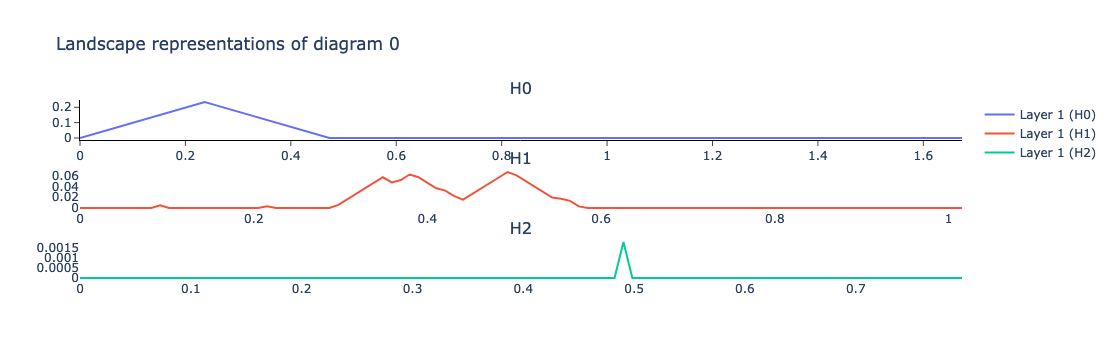

In [128]:
label = 2
landscape = PL.fit_transform(extended_persistence_diagrams["Label_"+str(label)])
PL.plot(landscape)

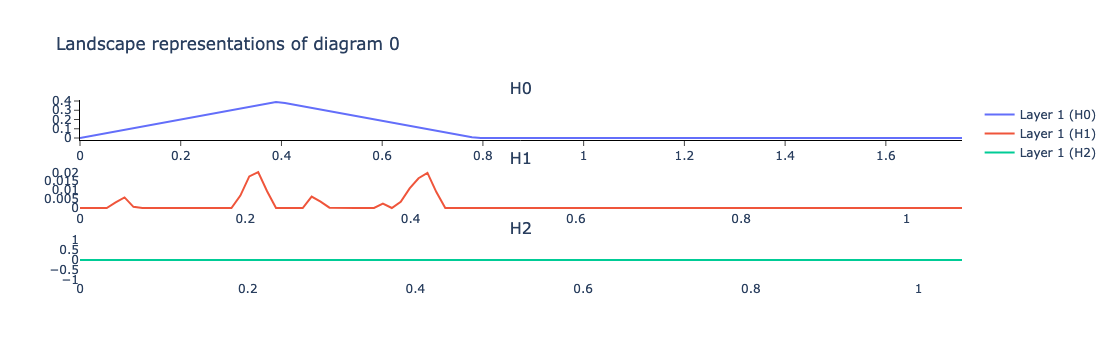

In [129]:
label = 4
landscape = PL.fit_transform(extended_persistence_diagrams["Label_"+str(label)])
PL.plot(landscape)

# Silhouette

In [130]:
SH = Silhouette()

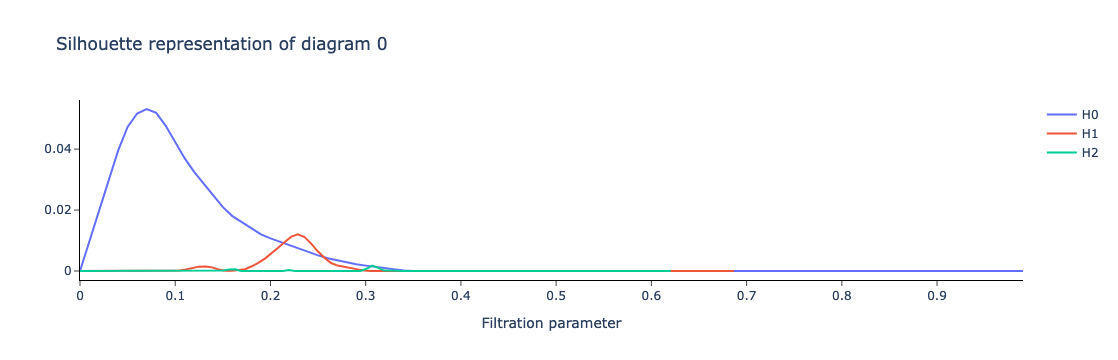

In [131]:
label = 0
silhouette = SH.fit_transform(extended_persistence_diagrams["Label_"+str(label)])
SH.plot(silhouette, homology_dimensions = [0, 1, 2])

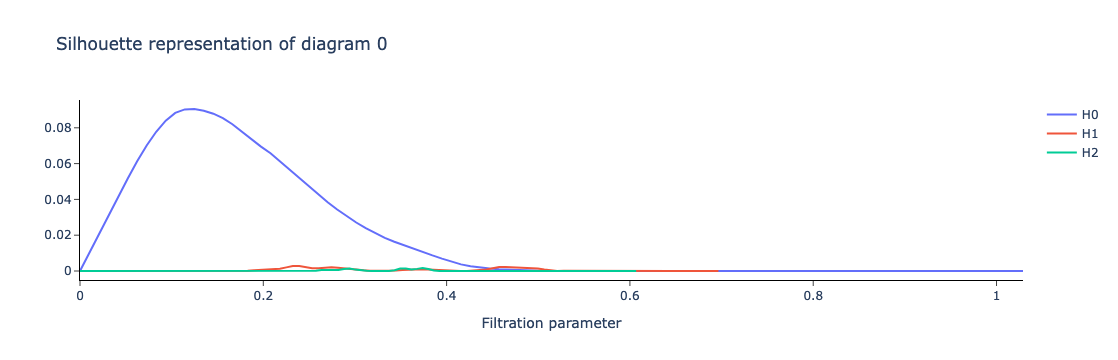

In [132]:
label = 1
silhouette = SH.fit_transform(extended_persistence_diagrams["Label_"+str(label)])
SH.plot(silhouette, homology_dimensions = [0, 1, 2])

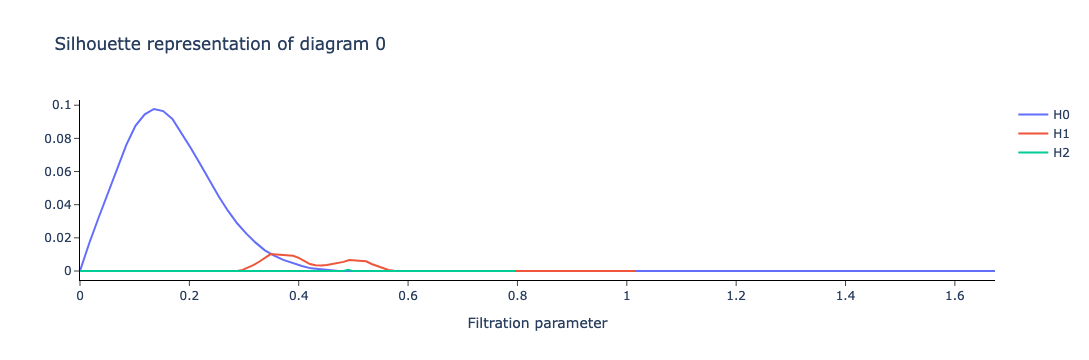

In [133]:
label = 2
silhouette = SH.fit_transform(extended_persistence_diagrams["Label_"+str(label)])
SH.plot(silhouette, homology_dimensions = [0, 1, 2])

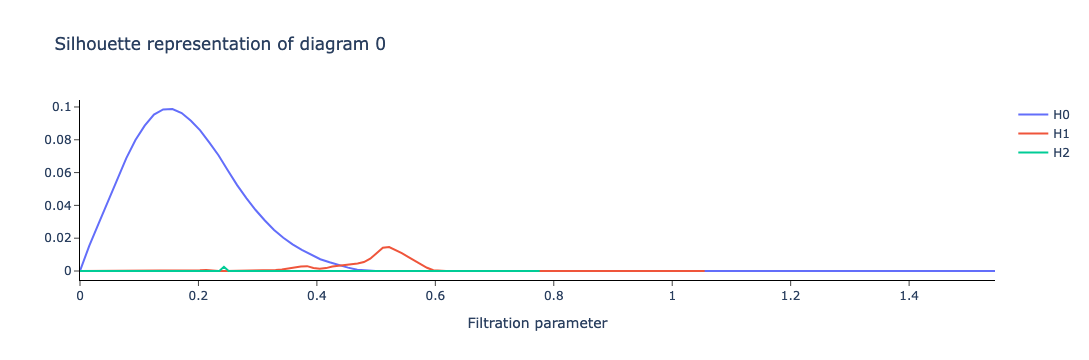

In [134]:
label = 3
silhouette = SH.fit_transform(extended_persistence_diagrams["Label_"+str(label)])
SH.plot(silhouette, homology_dimensions = [0, 1, 2])

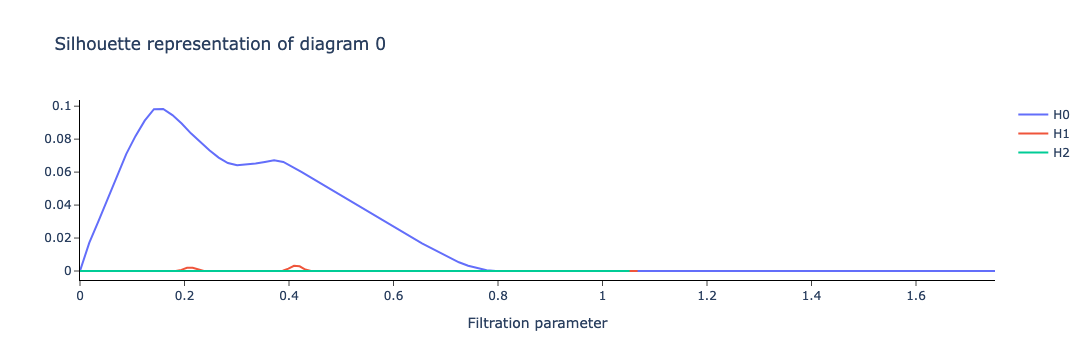

In [135]:
label = 4
silhouette = SH.fit_transform(extended_persistence_diagrams["Label_"+str(label)])

SH.plot(silhouette, homology_dimensions = [0, 1, 2])

# Betti Curve

In [136]:
BC = BettiCurve()

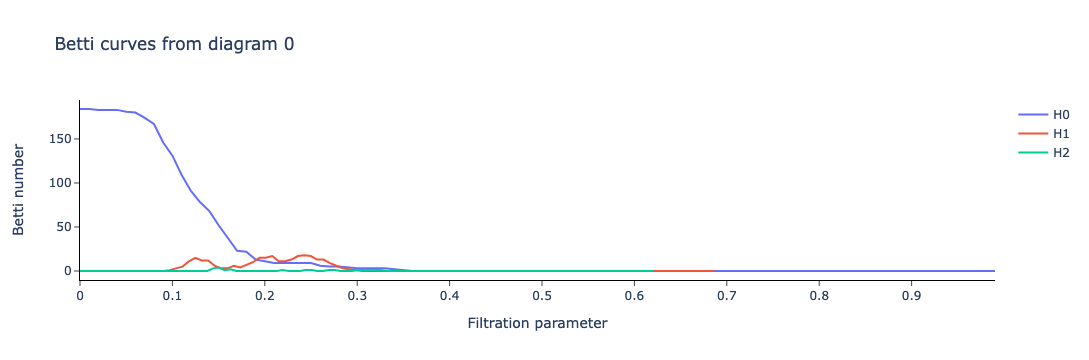

In [137]:
betti_curve = BC.fit_transform_plot(extended_persistence_diagrams["Label_0"])

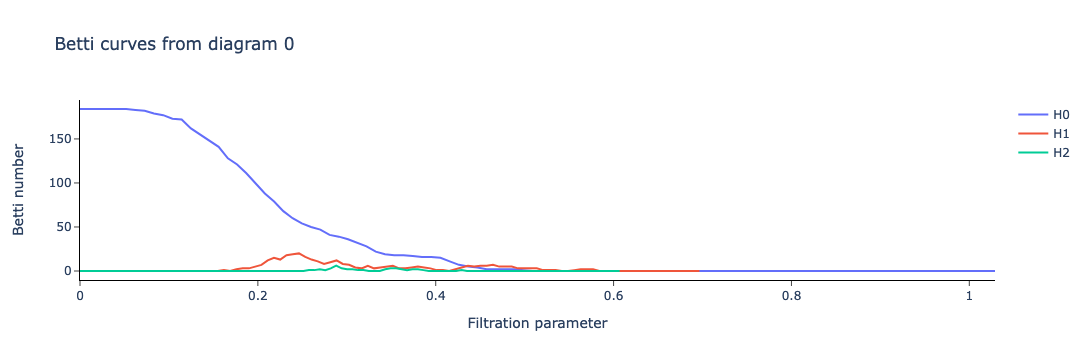

In [138]:
betti_curve = BC.fit_transform_plot(extended_persistence_diagrams["Label_1"])

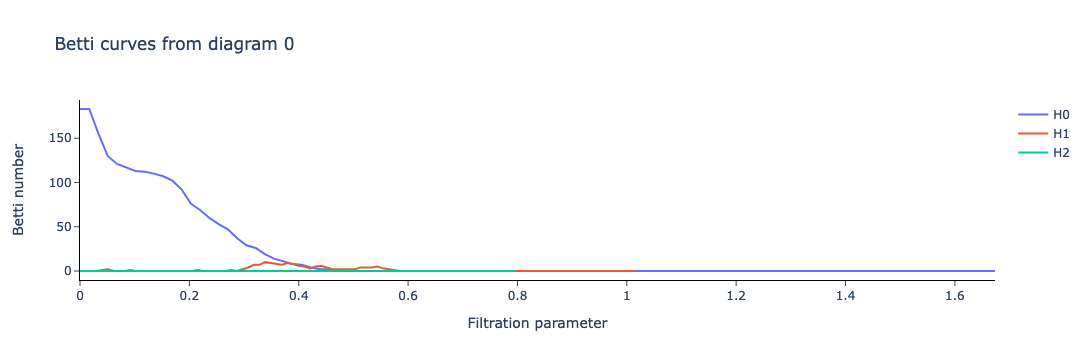

In [139]:
betti_curve = BC.fit_transform_plot(extended_persistence_diagrams["Label_2"])

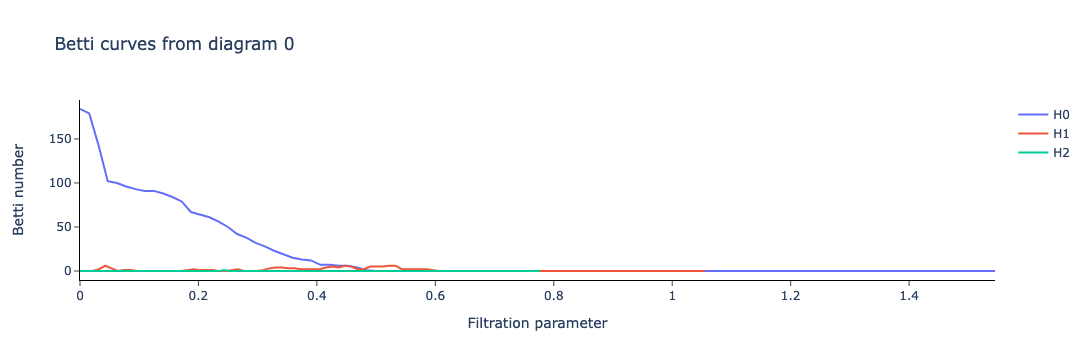

In [140]:
betti_curve = BC.fit_transform_plot(extended_persistence_diagrams["Label_3"])

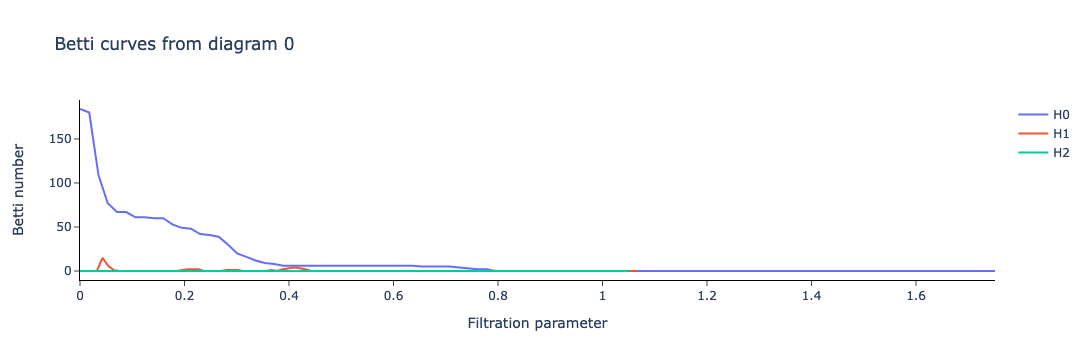

In [141]:
betti_curve = BC.fit_transform_plot(extended_persistence_diagrams["Label_4"])

# Persistence Images

In [142]:
PI = PersistenceImage(sigma=0.2, n_bins=100)

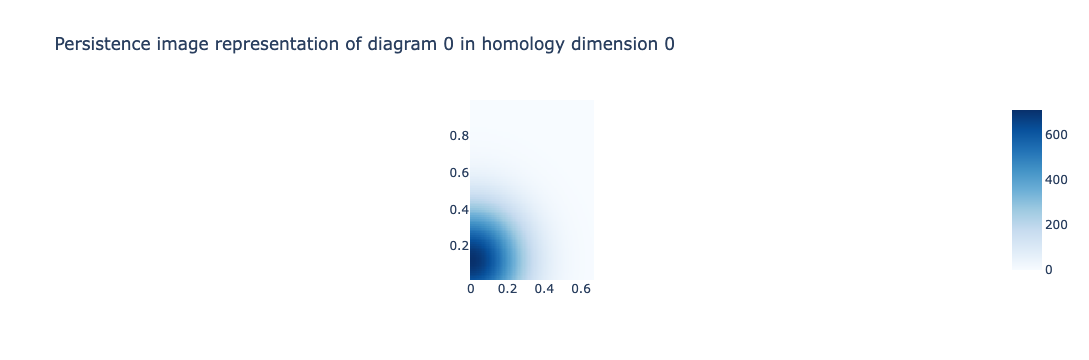

In [143]:
persistence_image = PI.fit_transform_plot(extended_persistence_diagrams["Label_0"])

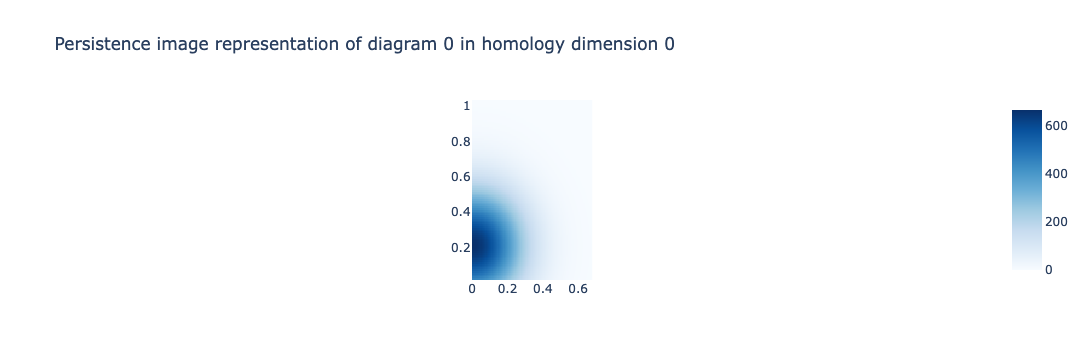

In [144]:
persistence_image = PI.fit_transform_plot(extended_persistence_diagrams["Label_1"])

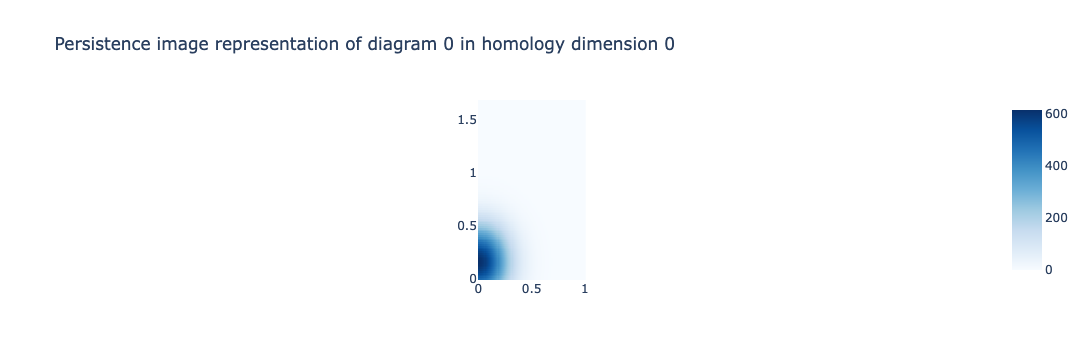

In [145]:
persistence_image = PI.fit_transform_plot(extended_persistence_diagrams["Label_2"])

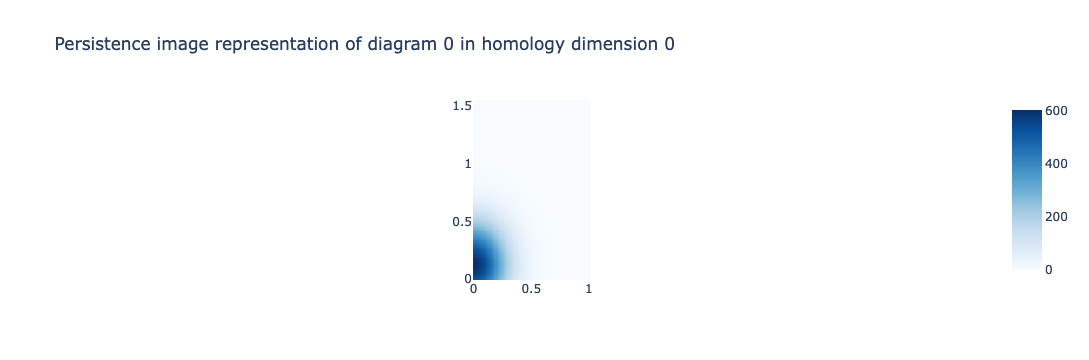

In [146]:
persistence_image = PI.fit_transform_plot(extended_persistence_diagrams["Label_3"])

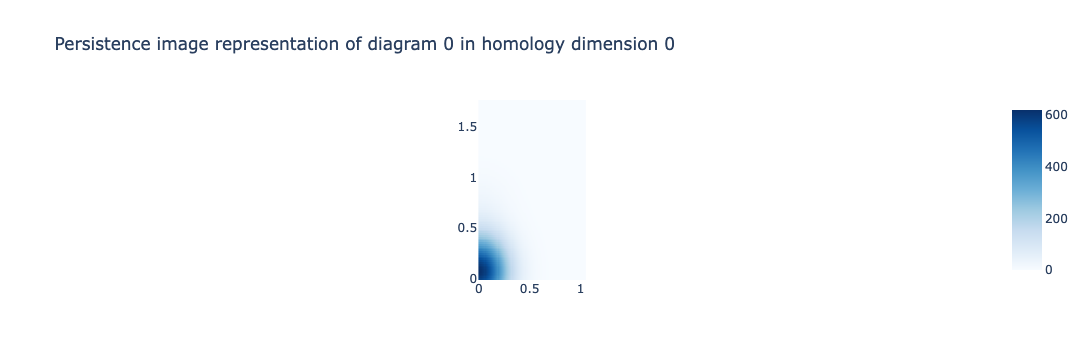

In [147]:
persistence_image = PI.fit_transform_plot(extended_persistence_diagrams["Label_4"])

# Dimensionality reduced visualizations of Signature Vectorizations

First of all, combine all (extended persistence diagrams) to later examine the visualizations for clusters.

In [148]:
all_extended_diagrams = []

for label in label_list:
    all_extended_diagrams = all_extended_diagrams + extended_persistence_diagrams["Label_"+str(label)]

In [173]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing this for 3D plotting
import umap.umap_ as umap  # Correcting the import for UMAP

def separate_signature_according_to_dimension(signature):
    """
    Separate the landscape vectors according to each dimension.

    Parameters:
    - signature (list): Signature vector.

    Returns:
    - vectors (dict): Dictionary containing lists of vectors for each dimension.
    """
    vectors = {}
    
    for hom_dim in range(3):
        vectors["Dimension_" + str(hom_dim)] = []
        
        for vector_for_single_diagram in signature:
            vectors["Dimension_" + str(hom_dim)].append(vector_for_single_diagram[hom_dim])
    
    return vectors

def compute_umap_embedding(signature, random_state=1):
    """
    Perform UMAP dimensionality reduction to 3 dimensions.

    Parameters:
    - signature (list): List containing the signature data.

    Returns:
    - embedding (numpy array): The 3-dimensional UMAP embedding.
    """
    # Perform UMAP dimensionality reduction to 3 dimensions
    reducer = umap.UMAP(n_components=3, random_state=random_state)
    embedding = reducer.fit_transform(signature)
    return embedding

def visualize_embedding(embedding, title="Signature"):
    """
    Visualize the 3-dimensional UMAP embedding.

    Parameters:
    - embedding (numpy array): The 3-dimensional UMAP embedding.
    - title (str): Title for the plot.

    Returns:
    None
    """
    # Visualize the embedding
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], cmap='viridis')

    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    ax.set_title('Visualization of the Dimensionality Reduced ' + str(title))
    plt.show()


def compute_kernel_pca_embedding(data, kernel='rbf', n_components=3):
    """
    Compute a Kernel PCA reduced embedding with 3 dimensions.
    
    Parameters:
        data (numpy.ndarray): Input data matrix of shape (n_samples, n_features).
        kernel (str): Kernel function to be used ('rbf', 'poly', 'sigmoid', 'linear').
        n_components (int): Number of components for dimensionality reduction.
        
    Returns:
        numpy.ndarray: Kernel PCA reduced embedding of shape (n_samples, 3).
    """
    # Initialize Kernel PCA with specified kernel function
    kpca = KernelPCA(kernel=kernel, n_components=n_components, random_state=42)
    
    # Fit and transform the data
    embedding = kpca.fit_transform(data)
    
    return embedding
    


## Heatkernel

Loading quite long.

In [150]:
heatkernel = HK.fit_transform(all_extended_diagrams)

In [168]:
vectors = separate_signature_according_to_dimension(heatkernel)

In [169]:
embedding = compute_kernel_pca_embedding(vectors["Dimension_0"])
visualize_embedding(embedding, "Heat Kernel of Dimension 0")

ValueError: Found array with dim 3. Estimator expected <= 2.

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_14533/1259648021.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



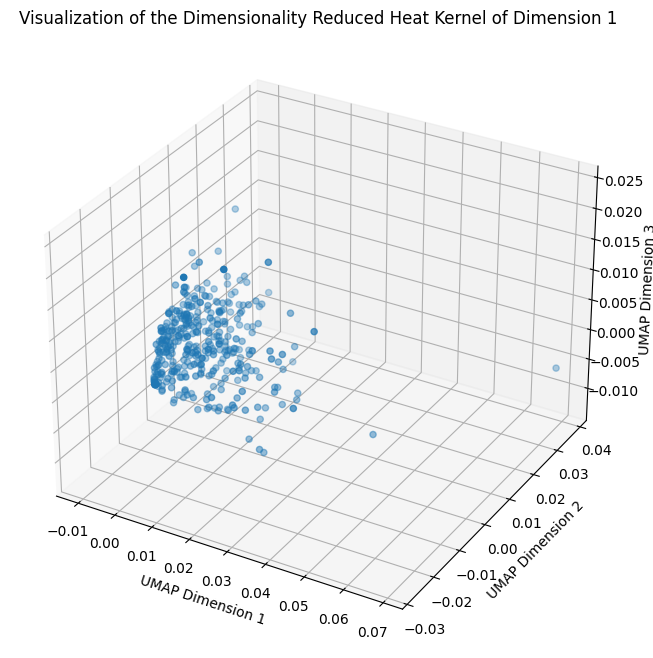

In [167]:
embedding = compute_kernel_pca_embedding(vectors["Dimension_1"])
visualize_embedding(embedding, "Heat Kernel of Dimension 1")

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_14533/1259648021.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



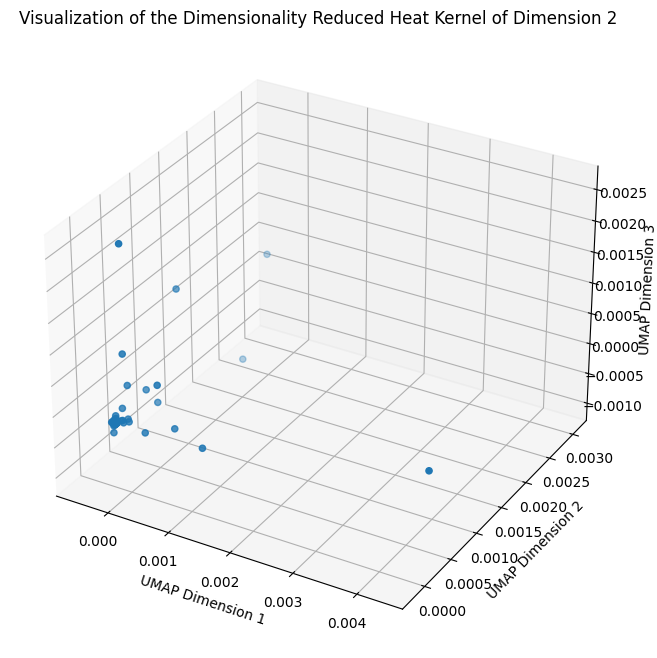

In [154]:
embedding = compute_kernel_pca_embedding(vectors["Dimension_2"])
visualize_embedding(embedding, "Heat Kernel of Dimension 2")

## Persistence Image

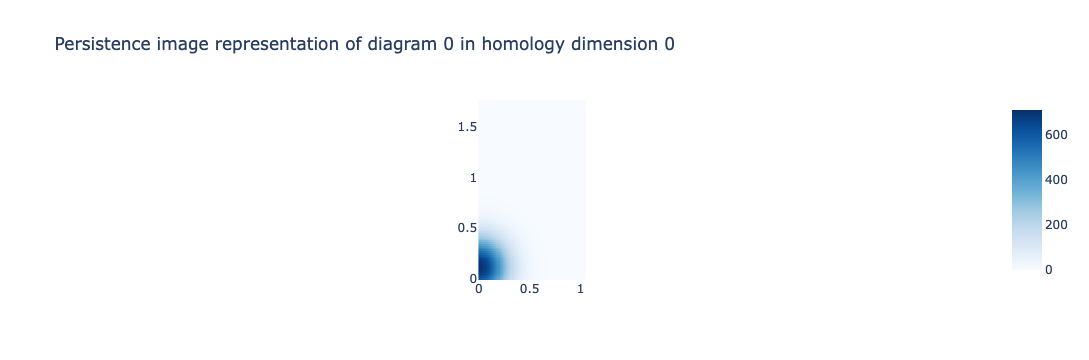

In [170]:
persistence_image = PI.fit_transform_plot(all_extended_diagrams)

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_14533/447991083.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



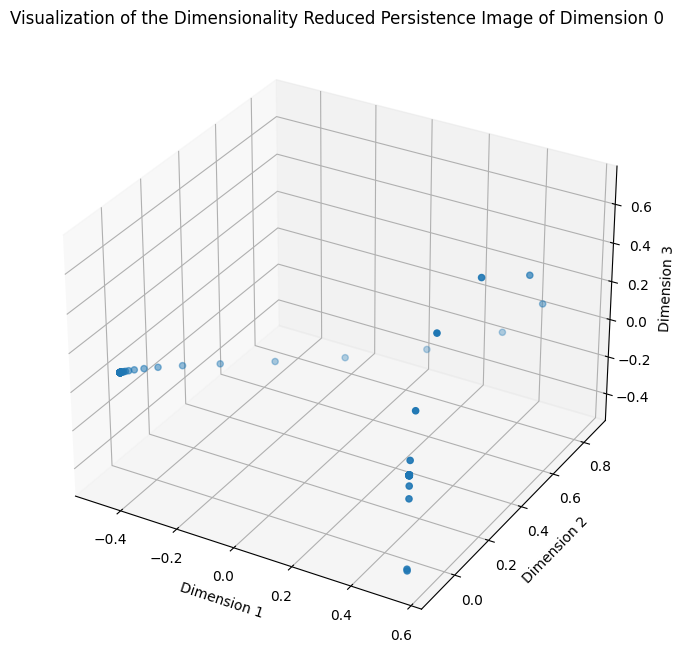

In [174]:
embedding= compute_kernel_pca_embedding(persistence_image[0][0])

visualize_embedding(embedding, "Persistence Image of Dimension 0")

/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_14533/447991083.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



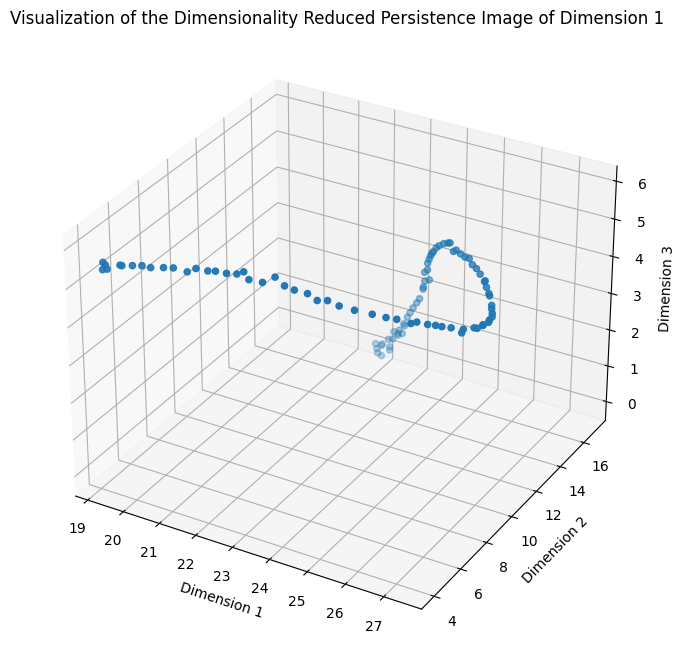

In [175]:
embedding= compute_umap_embedding(persistence_image[0][1])

visualize_embedding(embedding, "Persistence Image of Dimension 1")

/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_14533/447991083.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



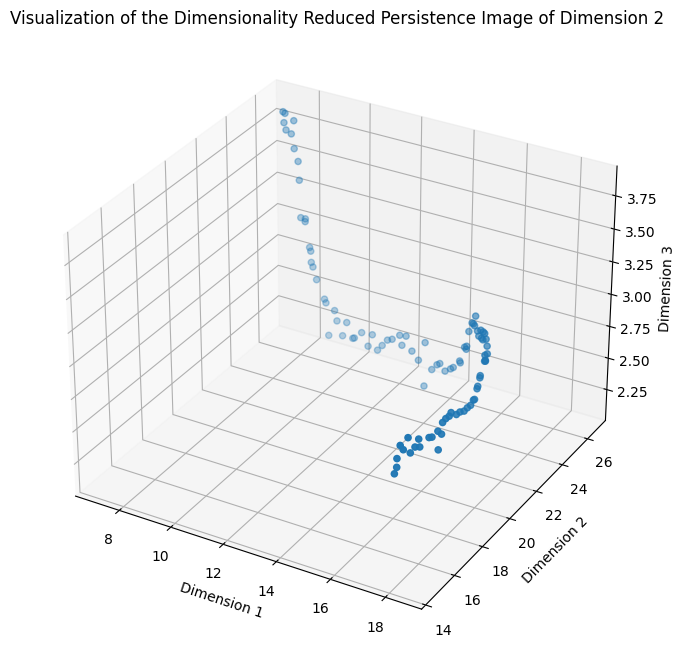

In [176]:
embedding= compute_umap_embedding(persistence_image[0][2])

visualize_embedding(embedding, "Persistence Image of Dimension 2")

## Betti Curve

In [177]:
betti_curve = BC.fit_transform_plot(all_extended_diagrams)

/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_14533/447991083.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



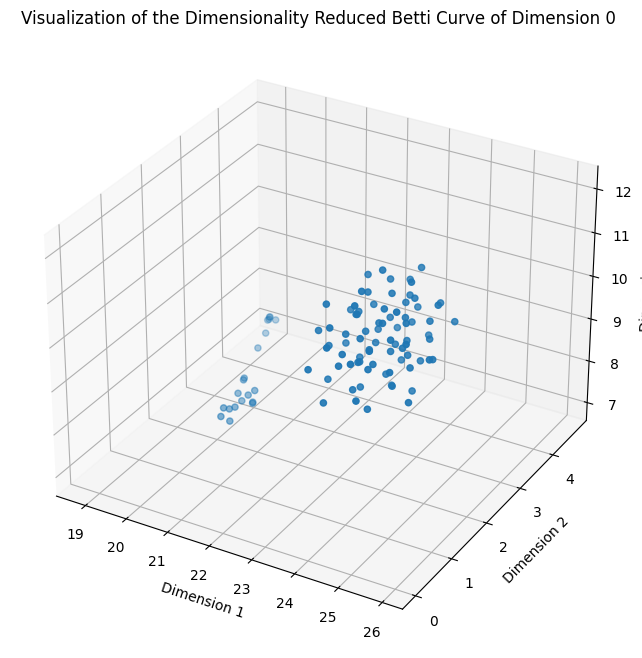

In [180]:
embedding= compute_umap_embedding(betti_curve[0][0].reshape(-1, 1))

visualize_embedding(embedding, "Betti Curve of Dimension 0")

/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_14533/447991083.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



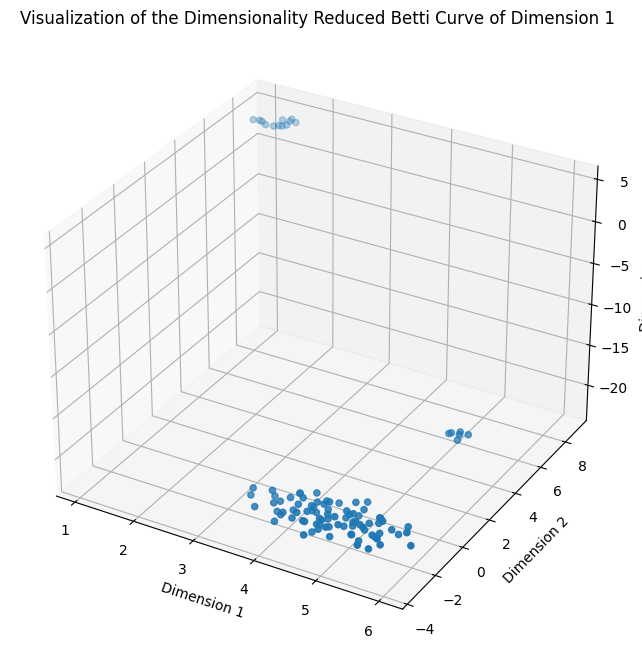

In [182]:
embedding= compute_umap_embedding(betti_curve[0][1].reshape(-1, 1))

visualize_embedding(embedding, "Betti Curve of Dimension 1")

## Silhouette

In [183]:
silhouette = SH.fit_transform(all_extended_diagrams)

/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_14533/447991083.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



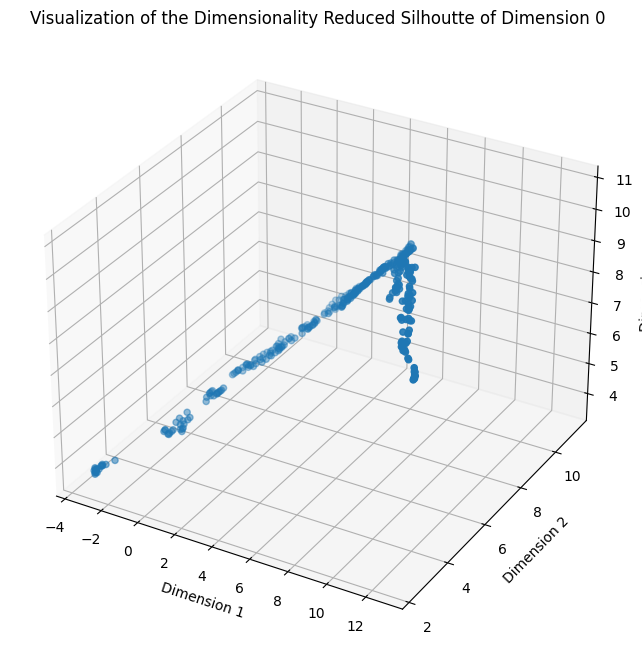

/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_14533/447991083.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_14533/447991083.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



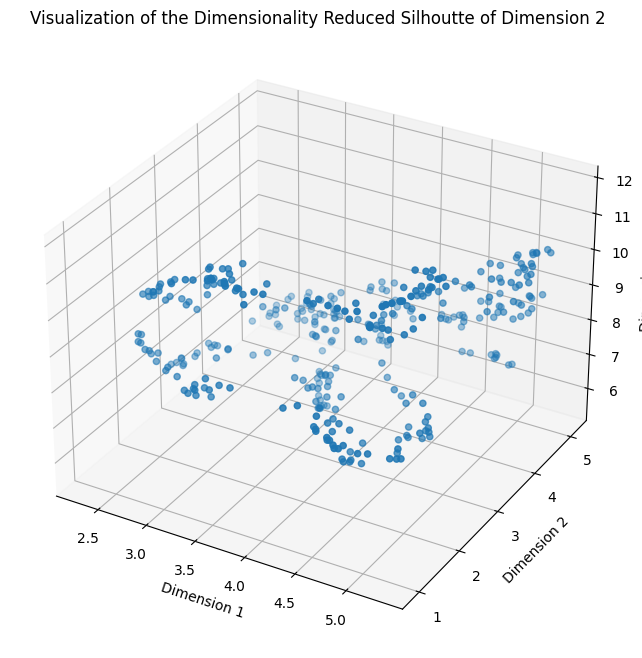

In [184]:
vectors = separate_signature_according_to_dimension(silhouette)

landscape_embedding = compute_umap_embedding(vectors["Dimension_0"])
visualize_embedding(landscape_embedding, "Silhoutte of Dimension 0")

landscape_embedding = compute_umap_embedding(vectors["Dimension_1"])
visualize_embedding(landscape_embedding, "Silhoutte of Dimension 1")

landscape_embedding = compute_umap_embedding(vectors["Dimension_2"])
visualize_embedding(landscape_embedding, "Silhoutte of Dimension 2")

## Landscape

In [164]:
landscape = PL.fit_transform(all_extended_diagrams)

/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_14533/1259648021.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



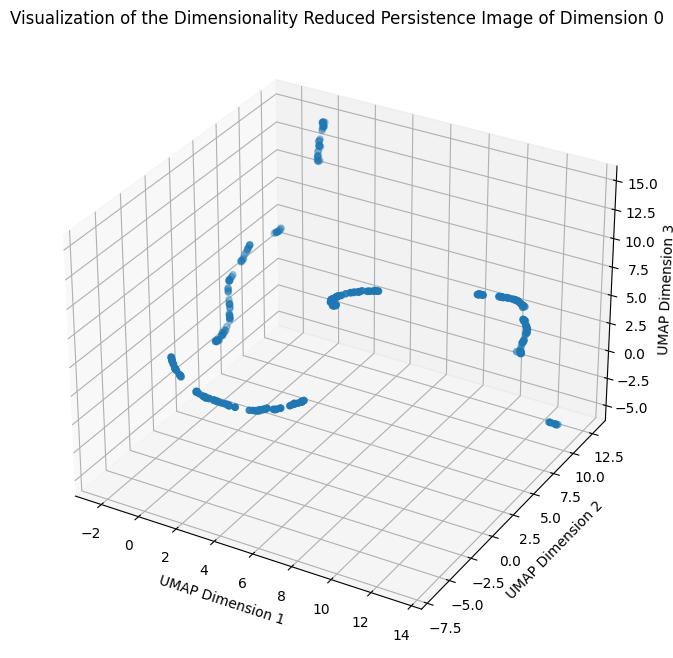

/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_14533/1259648021.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



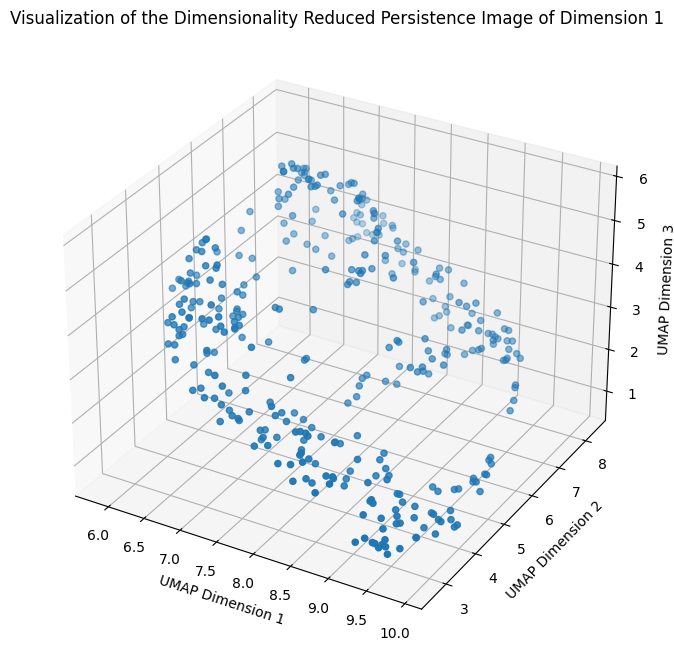

/Users/piabaronetzky/anaconda3/envs/time-delay-embeddings/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_14533/1259648021.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



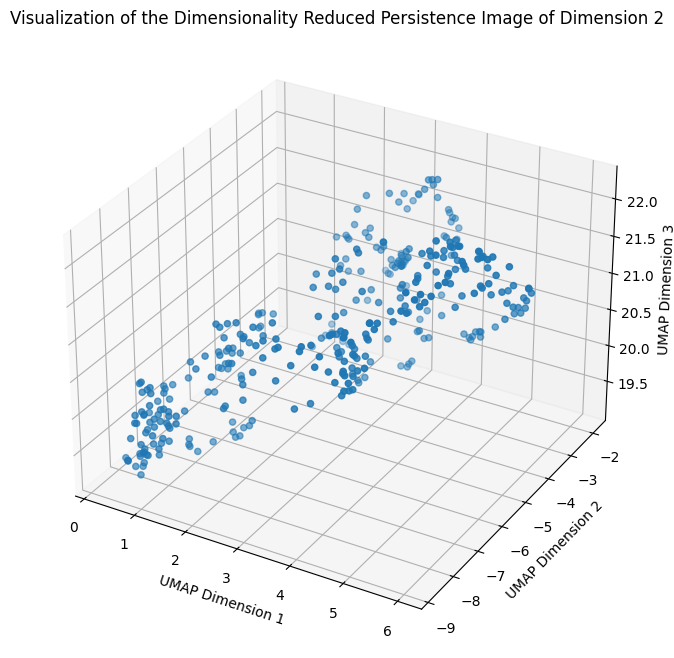

In [165]:
vectors = separate_signature_according_to_dimension(landscape)

landscape_embedding = compute_umap_embedding(vectors["Dimension_0"])
visualize_embedding(landscape_embedding, "Persistence Image of Dimension 0")

landscape_embedding = compute_umap_embedding(vectors["Dimension_1"])
visualize_embedding(landscape_embedding, "Persistence Image of Dimension 1")

landscape_embedding = compute_umap_embedding(vectors["Dimension_2"])
visualize_embedding(landscape_embedding, "Persistence Image of Dimension 2")

## ATOL Vectorizations

In [37]:
atol_feature_df.columns

Index(['Unnamed: 0', 'EEG_PD_Vectorization_Coord_0',
       'EEG_PD_Vectorization_Coord_1', 'EEG_PD_Vectorization_Coord_2',
       'EEG_HK_Vectorization_Dim_0Coord_0',
       'EEG_HK_Vectorization_Dim_0Coord_1',
       'EEG_HK_Vectorization_Dim_0Coord_2',
       'EEG_HK_Vectorization_Dim_1Coord_0',
       'EEG_HK_Vectorization_Dim_1Coord_1',
       'EEG_HK_Vectorization_Dim_1Coord_2',
       'EEG_HK_Vectorization_Dim_2Coord_0',
       'EEG_HK_Vectorization_Dim_2Coord_1',
       'EEG_HK_Vectorization_Dim_2Coord_2',
       'EEG_BC_Vectorization_Dim_0Coord_0',
       'EEG_BC_Vectorization_Dim_0Coord_1',
       'EEG_BC_Vectorization_Dim_0Coord_2',
       'EEG_BC_Vectorization_Dim_1Coord_0',
       'EEG_BC_Vectorization_Dim_1Coord_1',
       'EEG_BC_Vectorization_Dim_1Coord_2',
       'EEG_BC_Vectorization_Dim_2Coord_0',
       'EEG_BC_Vectorization_Dim_2Coord_1',
       'EEG_BC_Vectorization_Dim_2Coord_2',
       'EEG_SH_Vectorization_Dim_0Coord_0',
       'EEG_SH_Vectorization_Dim_0Coord_

### Persistence Diagrams

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_77682/1730553712.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], cmap='viridis')


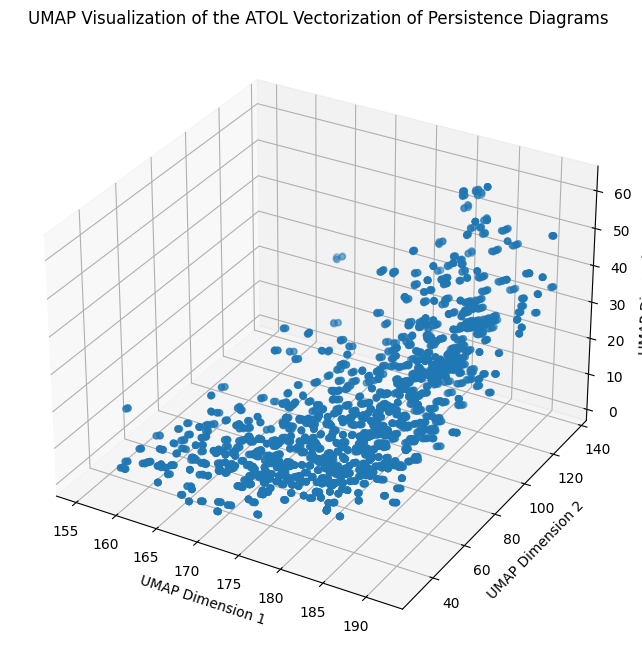

In [38]:
vector_df = atol_feature_df[["EEG_PD_Vectorization_Coord_0", "EEG_PD_Vectorization_Coord_1", "EEG_PD_Vectorization_Coord_2"]]
vectors = diagram_vector_df.values
visualize_embedding(vectors, "ATOL Vectorization of Persistence Diagrams")

### Heatkernel

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_77682/1730553712.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], cmap='viridis')


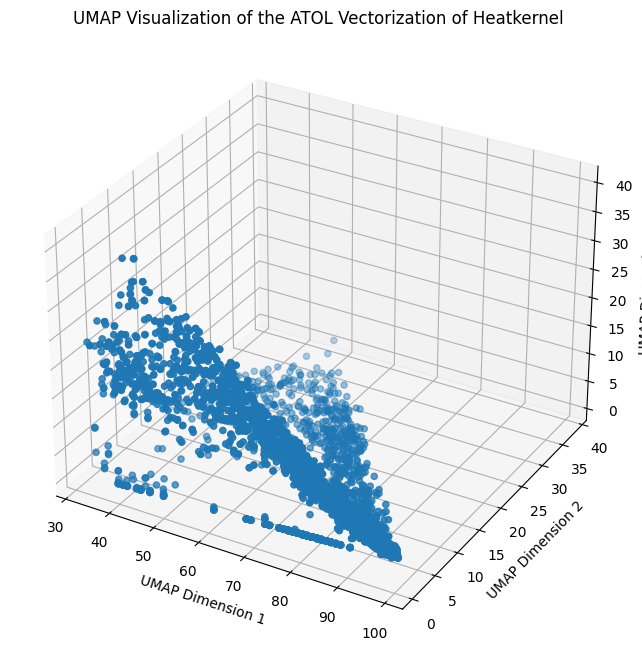

In [39]:
vector_df = atol_feature_df[["EEG_HK_Vectorization_Dim_0Coord_0", "EEG_HK_Vectorization_Dim_0Coord_1", "EEG_HK_Vectorization_Dim_0Coord_2"]]
vectors = vector_df.values
visualize_embedding(vectors, "ATOL Vectorization of Heatkernel, Homology Dimension 0")

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_77682/1730553712.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], cmap='viridis')


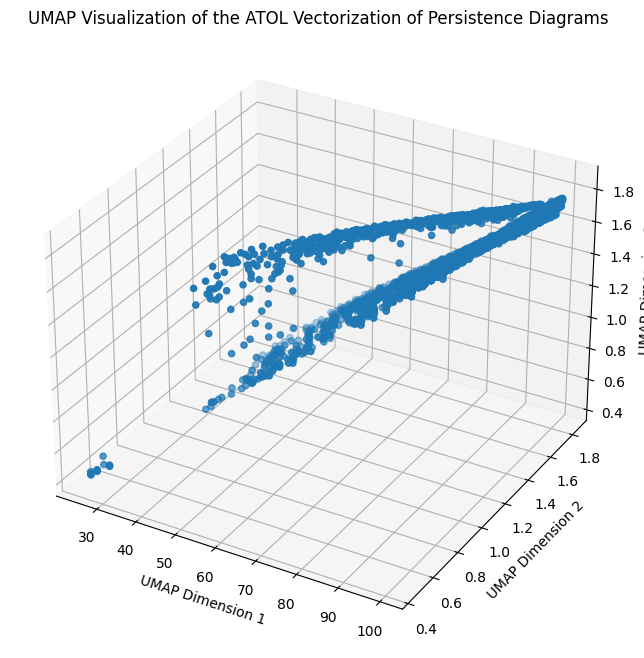

In [40]:
vector_df = atol_feature_df[["EEG_HK_Vectorization_Dim_1Coord_0", "EEG_HK_Vectorization_Dim_1Coord_1", "EEG_HK_Vectorization_Dim_1Coord_2"]]
vectors = vector_df.values
visualize_embedding(vectors,  "ATOL Vectorization of Heatkernel, Homology Dimension 1")

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_77682/1730553712.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], cmap='viridis')


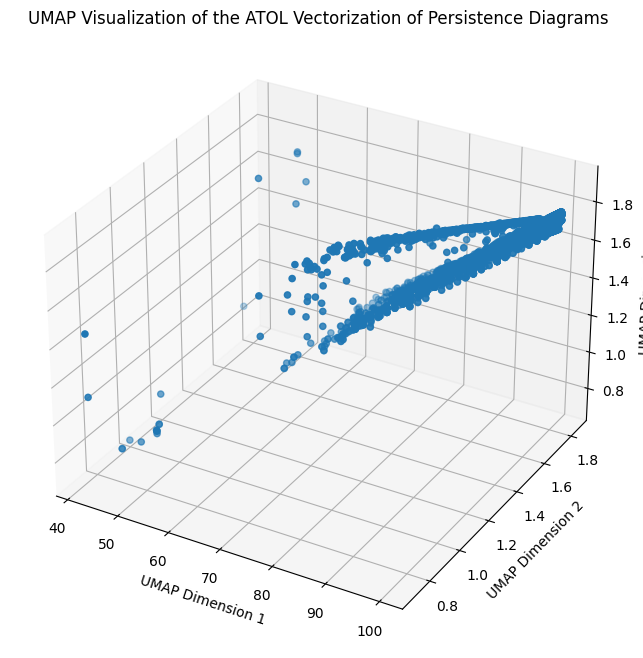

In [41]:
vector_df = atol_feature_df[["EEG_HK_Vectorization_Dim_2Coord_0", "EEG_HK_Vectorization_Dim_2Coord_1", "EEG_HK_Vectorization_Dim_2Coord_2"]]
vectors = vector_df.values
visualize_embedding(vectors,  "ATOL Vectorization of Heatkernel, Homology Dimension 2")

### Betti Curve

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_77682/1730553712.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], cmap='viridis')


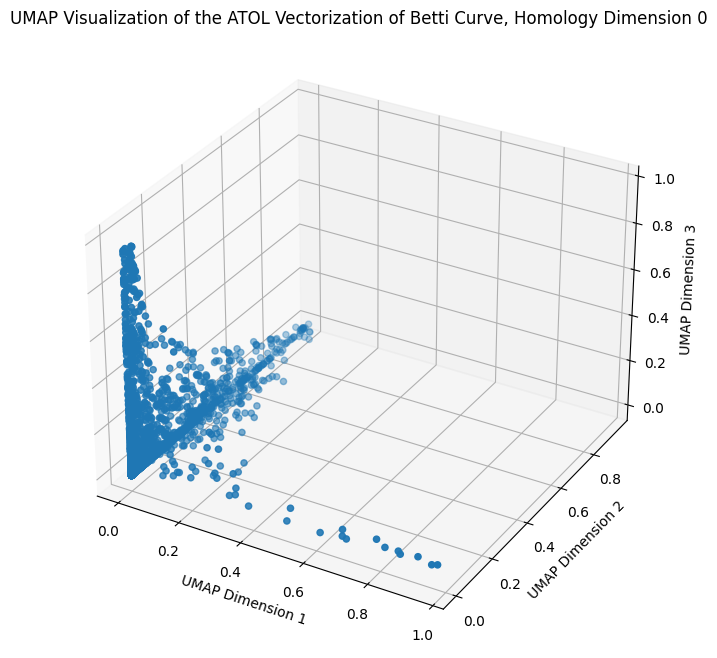

In [44]:
vector_df = atol_feature_df[["EEG_BC_Vectorization_Dim_0Coord_0", "EEG_BC_Vectorization_Dim_0Coord_1", "EEG_BC_Vectorization_Dim_0Coord_2"]]
vectors = vector_df.values
visualize_embedding(vectors, "ATOL Vectorization of Betti Curve, Homology Dimension 0")

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_77682/1730553712.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], cmap='viridis')


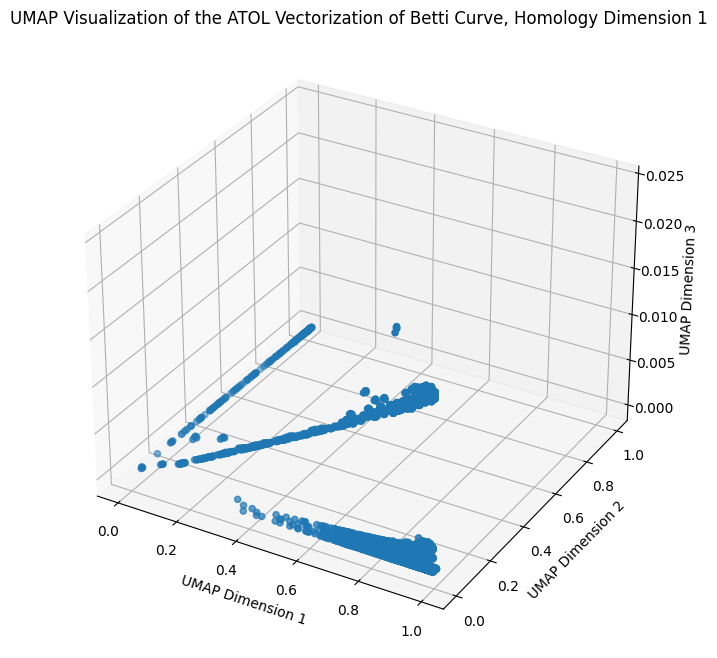

In [45]:
vector_df = atol_feature_df[["EEG_BC_Vectorization_Dim_1Coord_0", "EEG_BC_Vectorization_Dim_1Coord_1", "EEG_BC_Vectorization_Dim_1Coord_2"]]
vectors = vector_df.values
visualize_embedding(vectors, "ATOL Vectorization of Betti Curve, Homology Dimension 1")

### Silhouette

/var/folders/f_/tyg450s17m53dh3ylrjcmpqc0000gn/T/ipykernel_77682/1730553712.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], cmap='viridis')


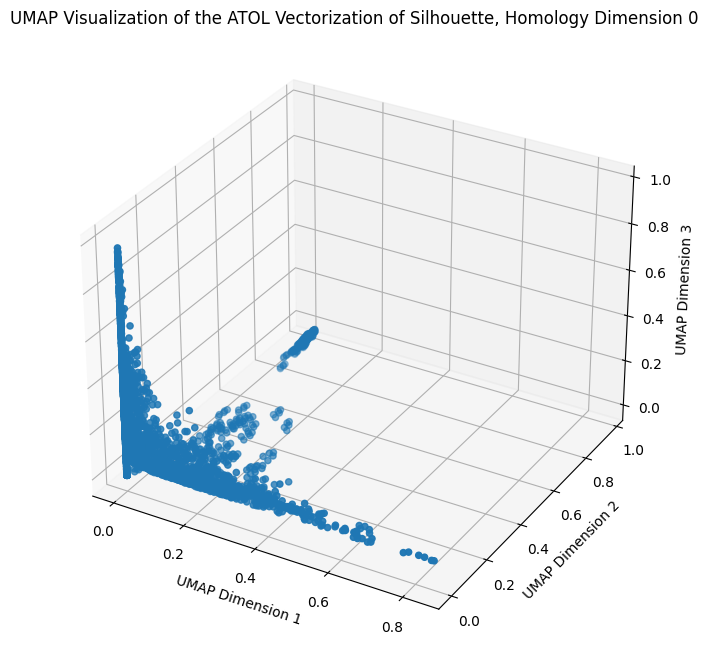

In [46]:
vector_df = atol_feature_df[["EEG_SH_Vectorization_Dim_0Coord_0", "EEG_SH_Vectorization_Dim_0Coord_1", "EEG_SH_Vectorization_Dim_0Coord_2"]]
vectors = vector_df.values
visualize_embedding(vectors, "ATOL Vectorization of Silhouette, Homology Dimension 0")